In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [2]:
name = 'xs_three_unicycle_mpc_mix_3'
xs = np.loadtxt("data/three_unicycle_mpc/"+name+".csv",  delimiter=",")
xs.shape

(12, 41)

In [3]:
images = []

# Loop through each data point and create a plot
for i in range(len(xs[0,:])):
    plt.plot(xs[0,0:i],xs[1,0:i],label="Agent-1")
    plt.plot(xs[4,0:i],xs[5,0:i],label="Agent-2")
    plt.plot(xs[8,0:i],xs[9,0:i],label="Agent-3")
    
    plt.scatter(0, 0, c='black', marker="o", label = "Start Position")
    plt.scatter(20, 0, c='black', marker="o" )
    plt.scatter(10, 10, c='black', marker="o") 
    plt.scatter(15, 5, c='black', marker="*", label = "Goal Position")
    plt.scatter(10, 0, c='black', marker="*")
    plt.scatter(5, 5, c='black', marker="*")
    plt.legend(loc='upper right', frameon=False)
    
    # Save the plot as an image
    plt.axis('off')
    filename = f'data/imgs_gif/image_{i}.png'
    plt.savefig(filename)
    plt.close()
    
    # Append the image to the list
    images.append(Image.open(filename))

images[0].save('data/three_unicycle_mpc/'+name+'.gif', save_all=True, append_images=images[1:], duration=200, loop=0)

In [6]:
name = 'xs_three_unicycle_potential_1'
xs = np.loadtxt("data/three_unicycle_potential_1/"+name+".csv",  delimiter=",")
xs.shape

(12, 50)

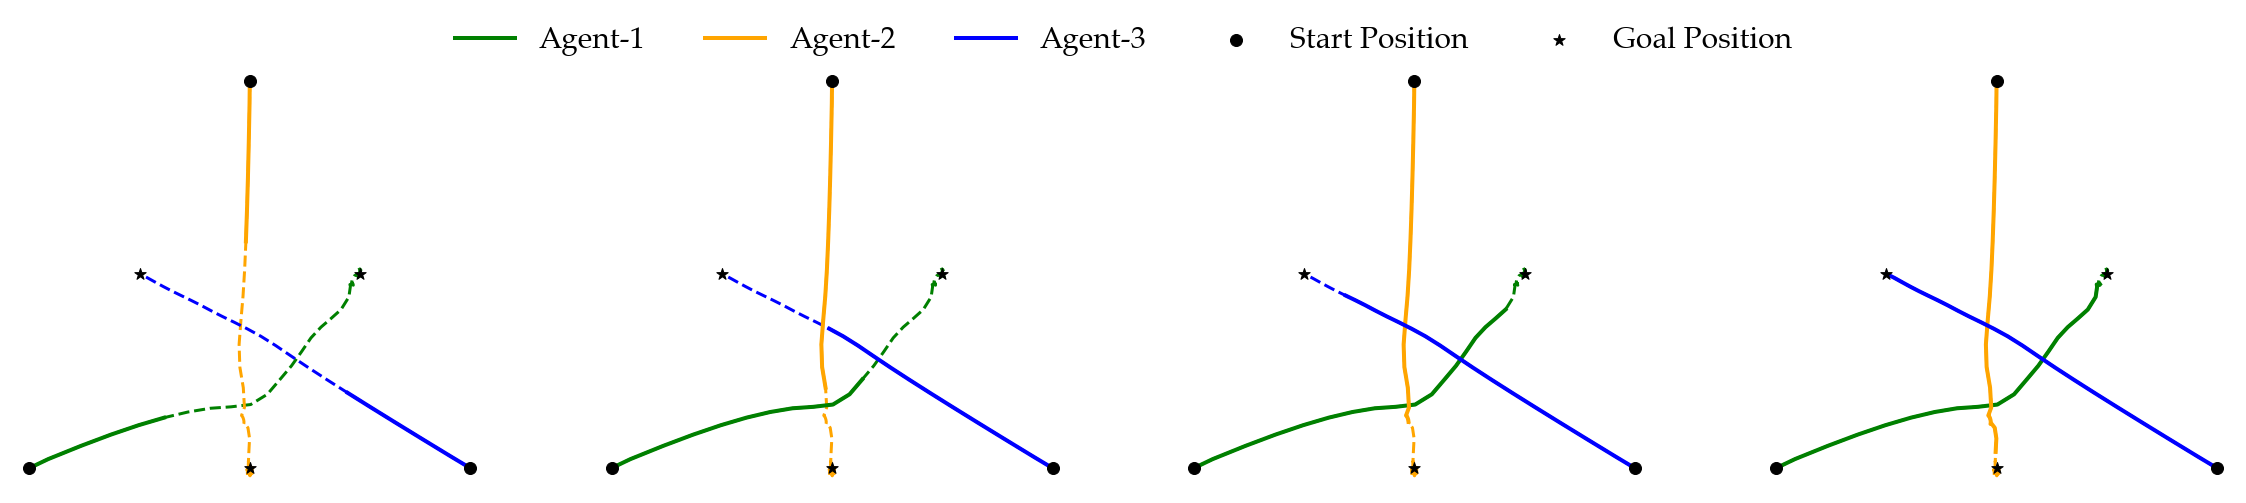

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(40,8))
font = {'fontname':'Palatino','size':13}
#fig.suptitle('Title',fontsize = 20, font='Palatino')

for i in range(4):
    
    axes[i].plot(xs[0,:],xs[1,:],color='green', linestyle='dashed',linewidth=3, zorder=1)
    axes[i].plot(xs[4,:],xs[5,:],color='orange', linestyle='dashed',linewidth=3, zorder=1)
    axes[i].plot(xs[8,0:30],xs[9,0:30],color='blue', linestyle='dashed',linewidth=3, zorder=1)
    
    axes[i].plot(xs[0,0:6*(i+1)],xs[1,0:6*(i+1)],color='green',label="Agent-1",linewidth=4, zorder=1)
    axes[i].plot(xs[4,0:6*(i+1)],xs[5,0:6*(i+1)],color='orange',label="Agent-2",linewidth=4, zorder=1)
    axes[i].plot(xs[8,0:6*(i+1)],xs[9,0:6*(i+1)],color='blue',label="Agent-3",linewidth=4, zorder=1)
    
    
    axes[i].scatter(0, 0, s=12**2, c='black', marker="o", label = "Start Position", zorder=2)
    axes[i].scatter(20, 0, s=12**2, c='black', marker="o", zorder=2 )
    axes[i].scatter(10, 10, s=12**2, c='black', marker="o", zorder=2) 
    axes[i].scatter(15, 5, s=12**2, c='black', marker="*", label = "Goal Position", zorder=2)
    axes[i].scatter(10, 0, s=12**2, c='black', marker="*", zorder=2)
    axes[i].scatter(5, 5, s=12**2, c='black', marker="*", zorder=2)   
    handles, labels = axes[i].get_legend_handles_labels()
    
#     #axes[i] = plt.axes([0, 0, 1, 1])
#     if i != 3:
#         axes[i].plot([30, 30], [0, 10], color='lightgrey', lw=1)
#         axes[i].set_axis_off()
#     else:
#         axes[i].plot([30, 30], [0, 10], color='white', lw=1)
    #axes[i].plot([0, 1], [0.5, 0.5], color='lightgrey', lw=5)
    axes[i].set_axis_off()

fig.legend(handles, labels, loc='upper center', ncol = 5, frameon=False, prop={'family': 'Palatino','size':30})

# ax1.plot(xs[0,0:12],xs[1,0:12],label="Agent-1")
# ax1.plot(xs[4,0:12],xs[5,0:12],label="Agent-2")
# ax1.plot(xs[8,0:12],xs[9,0:12],label="Agent-3")

# ax2.plot(xs[0,0:24],xs[1,0:24],label="Agent-1")
# ax2.plot(xs[4,0:24],xs[5,0:24],label="Agent-2")
# ax2.plot(xs[8,0:24],xs[9,0:24],label="Agent-3")

# ax3.plot(xs[0,0:36],xs[1,0:36],label="Agent-1")
# ax3.plot(xs[4,0:36],xs[5,0:36],label="Agent-2")
# ax3.plot(xs[8,0:36],xs[9,0:36],label="Agent-3")

# ax4.plot(xs[0,0:50],xs[1,0:50],label="Agent-1")
# ax4.plot(xs[4,0:50],xs[5,0:50],label="Agent-2")
# ax4.plot(xs[8,0:50],xs[9,0:50],label="Agent-3")

plt.savefig("../../figures/three_unicycle_potential.pdf",bbox_inches='tight')

In [6]:
xs = np.loadtxt("data/four_unicycle_potential/xs_four_unicycle_potential.csv",  delimiter=",")      

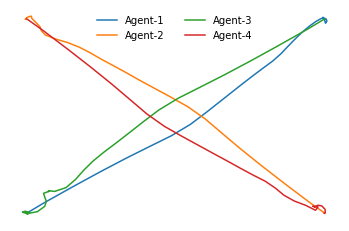

In [7]:
plt.plot(xs[0,0:50],xs[1,0:50],label="Agent-1")
plt.plot(xs[4,0:50],xs[5,0:50],label="Agent-2")
plt.plot(xs[8,0:50],xs[9,0:50],label="Agent-3")
plt.plot(xs[12,0:50],xs[13,0:50],label="Agent-4")
plt.legend(frameon=False, ncol=2, loc='upper center')
plt.axis('off')
plt.show()

In [8]:
def distance_to_goal(x,goal):
    return np.sqrt(((x-goal)**2).sum())

def closest_distance(x,y):
    return np.min(np.sqrt(np.sum((x-y)**2,axis=0)))

player_goals = np.array([[15,5],[10,0],[5,5]])

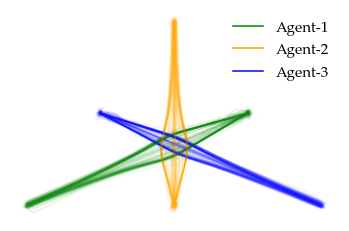

In [33]:
distance_goal = np.zeros([200,3])
players_distance = np.zeros([200,3])
for i in range(199):
    xs = np.loadtxt("data/three_unicycle_potential_mc/xs_three_unicycle_potential"+str(i)+".csv",  delimiter=",")
    x1 = xs[0:2,:]
    x2 = xs[4:6,:]
    x3 = xs[8:10,:]
    
    distance_goal[i,0] = distance_to_goal(x1[:,-1],player_goals[0,:])
    distance_goal[i,1] = distance_to_goal(x2[:,-1],player_goals[1,:])
    distance_goal[i,2] = distance_to_goal(x3[:,-1],player_goals[2,:])
    
#     print("Player-1 distnace to goal",distance_to_goal(x1[:,-1],player_goals[0,:]))
#     print("Player-2 distnace to goal",distance_to_goal(x2[:,-1],player_goals[1,:]))
#     print("Player-3 distnace to goal",distance_to_goal(x3[:,-1],player_goals[2,:]))
    
    players_distance[i,0] = closest_distance(x1,x2)
    players_distance[i,1] = closest_distance(x1,x3)
    players_distance[i,2] = closest_distance(x3,x2)

#     print("Closest distance between Player-1 and Player-2",closest_distance(x1,x2))
#     print("Closest distance between Player-1 and Player-3",closest_distance(x1,x3))
#     print("Closest distance between Player-2 and Player-3",closest_distance(x2,x3))
    
    plt.plot(xs[0,0:50],xs[1,0:50],color="green", alpha=0.05)
    plt.plot(xs[4,0:50],xs[5,0:50],color="orange", alpha=0.05)
    plt.plot(xs[8,0:50],xs[9,0:50],color="blue", alpha=0.05)
    #plt.plot(xs[12,0:50],xs[13,0:50],label="Agent-4")
    #plt.legend()
    #plt.show()xs(12*457)

i = 199
xs = np.loadtxt("data/three_unicycle_potential_mc/xs_three_unicycle_potential"+str(i)+".csv",  delimiter=",")
plt.plot(xs[0,0:50],xs[1,0:50],color="green",alpha=0.05)
plt.plot(xs[4,0:50],xs[5,0:50],color="orange",alpha=0.05)
plt.plot(xs[8,0:50],xs[9,0:50],color="blue",alpha=0.05)

plt.plot(xs[0,0:0],xs[1,0:0],color="green",label="Agent-1")
plt.plot(xs[4,0:0],xs[5,0:0],color="orange",label="Agent-2")
plt.plot(xs[8,0:0],xs[9,0:0],color="blue",label="Agent-3")
plt.axis('off')
plt.legend(frameon=False,ncol=1,prop={'family': 'Palatino','size':15})
#handles, labels = plt.get_legend_handles_labels()
#plt.legend(handles, labels, loc='upper center', ncol = 5, frameon=False, prop={'family': 'Palatino','size':15})

plt.savefig("../../figures/three_unicycle_mc.pdf",bbox_inches='tight')

In [22]:
print("Player-1 average distnace to goal",np.mean(distance_goal[:,0]))
print("Player-2 average distnace to goal",np.mean(distance_goal[:,1]))
print("Player-3 average distnace to goal",np.mean(distance_goal[:,2]))

Player-1 average distnace to goal 0.07845375880243058
Player-2 average distnace to goal 0.08201935345055258
Player-3 average distnace to goal 0.033094377362894056


In [23]:
print("Average closest distance between Player-1 and Player-2",np.mean(players_distance[:,0]))
print("Average closest distance between Player-1 and Player-3",np.mean(players_distance[:,1]))
print("Average closest distance between Player-2 and Player-3",np.mean(players_distance[:,2]))

Average closest distance between Player-1 and Player-2 1.0843224575266006
Average closest distance between Player-1 and Player-3 0.8693771610766029
Average closest distance between Player-2 and Player-3 0.9715403094888783


In [35]:
name = 'xs_three_unicycle_potential_1'
xs_pot = np.loadtxt("data/three_unicycle_potential/"+name+".csv",  delimiter=",")

name = 'xs_three_unicycle_feedback_1'
xs_feed = np.loadtxt("data/three_unicycle_feedback_1/"+name+".csv",  delimiter=",")

In [58]:
def distance_array(x,y):
    return np.sqrt(np.sum((x - y)**2,axis=0))

player_goals = np.array([[15,5],[10,0],[5,5]])
player_init = np.array([[0,0],[10,10],[20,0]])

distance_array(player_goals[0,:], player_init[0,:])

15.811388300841896

In [59]:
d1 = distance_array(xs_pot[0:2,:],xs_feed[0:2,:])/distance_array(player_goals[0,:], player_init[0,:])
d2 = distance_array(xs_pot[4:6,:],xs_feed[4:6,:])/distance_array(player_goals[1,:], player_init[1,:])
d3 = distance_array(xs_pot[8:10,:],xs_feed[8:10,:])/distance_array(player_goals[2,:], player_init[2,:])

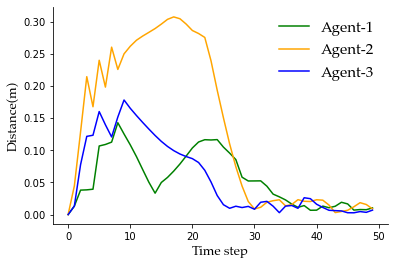

In [77]:
ax = plt.subplot()
ax.plot(d1, label = "Agent-1",color="green")
ax.plot(d2, label = "Agent-2",color="orange")
ax.plot(d3, label = "Agent-3",color="blue")
ax.spines[['right', 'top']].set_visible(False)
ax.legend(frameon=False,ncol=1,prop={'family': 'Palatino','size':15})
plt.xlabel("Time step",fontdict={'family': 'Palatino','size':13})
plt.ylabel("Distance(m)",fontdict={'family': 'Palatino','size':13})

plt.savefig("../../figures/three_unicycle_comparision.pdf",bbox_inches='tight')

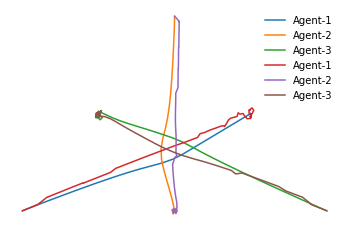

In [53]:
plt.plot(xs_pot[0,0:50],xs_pot[1,0:50],label="Agent-1")
plt.plot(xs_pot[4,0:50],xs_pot[5,0:50],label="Agent-2")
plt.plot(xs_pot[8,0:50],xs_pot[9,0:50],label="Agent-3")
plt.plot(xs_feed[0,0:50],xs_feed[1,0:50],label="Agent-1")
plt.plot(xs_feed[4,0:50],xs_feed[5,0:50],label="Agent-2")
plt.plot(xs_feed[8,0:50],xs_feed[9,0:50],label="Agent-3")
#plt.plot(xs[12,0:50],xs[13,0:50],label="Agent-4")
plt.legend(frameon=False)
plt.axis('off')
plt.show()